## Tourism Spot Recommendation System



**Recommendation systems have become widely popular in today's world, with applications in virtually every sector ranging from e-commerce to banking.**

In [1]:
#Imprt necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('dark')

We will be making use of three datasets gotten from kaggle. The datasets are dummy datasets created to mimick real life data collected from tourists for a destination. 

* The first dataset contains users and ratings for 23 different spots which may be restaurants,beaches and the likes.

* The second contains information about the users; users' age, gender, region,job etc

* The third dataset contains information about the destination spots and their classifications and quality on a scale of 5.

Starting with the destination dataset

In [2]:
#read in dataset
destination_spots=pd.read_csv(r'C:\Users\jessica.ogwu\Desktop\Tourism spot recommendation system\tourism\tourism datasets\destination_info.csv')
destination_spots

,itemId,ItemName,Category,Quality
0,0,Restaurant Fake,['Gastro'],1.647351
1,1,Fiction Nightclub,['Nightlf'],1.188559
2,2,Random Shopping Mall,"['Shop', 'Relax']",2.948170
3,3,Bogus Waterpark,['Themeprk'],1.830793
4,4,Unknown Nature Route,"['Nature', 'Relax']",2.782113
5,5,Some Sport Event,"['Sports', 'Events']",4.476363
6,6,Never Happened Festival,"['Events', 'Culture']",1.836556
7,7,False Tavern,"['Gastro', 'Culture']",1.365270
8,8,MakeBelieve Pub,"['Gastro', 'Nightlf']",1.957996
9,9,Another Sport Event,"['Sports', 'Events']",2.133209


In [3]:
destination_spots.shape

(23, 4)

The dataset contains 23 destination spots ranging from restaurants to beaches to sports. 

In [4]:
destination_spots.describe()

,itemId,Quality
count,23.00000,23.000000
mean,11.00000,2.732131
std,6.78233,1.349089
min,0.00000,1.188559
25%,5.50000,1.640455
50%,11.00000,2.133209
75%,16.50000,4.043922
max,22.00000,4.984842


In [5]:
#Get information about dataset
destination_spots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   itemId    23 non-null     int64  
 1   ItemName  23 non-null     object 
 2   Category  23 non-null     object 
 3   Quality   23 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 864.0+ bytes


There are no null values in the dataset as seen from the above.

In [6]:
#Explore catgories of destinations available
destination_spots['Category'].unique()

array(["['Gastro']", "['Nightlf']", "['Shop', 'Relax']", "['Themeprk']",
       "['Nature', 'Relax']", "['Sports', 'Events']",
       "['Events', 'Culture']", "['Gastro', 'Culture']",
       "['Gastro', 'Nightlf']", "['Culture']", "['Sports', 'Nature']",
       "['Shop']", "['Relax']", "['Sports']", "['Beach']"], dtype=object)

In [7]:
destination_spots['Category'].nunique()

15

There are 15 unique categories according to the dataset. Although some restaurants have a combination of 2 categories.

In [8]:
len(destination_spots['Category'].unique()[0])

10

In [9]:
#Define a function to count the number of individual categories for the destinations
def count_categories(category):
    count=0
    for i in destination_spots['Category']:
        if category in i:
            count+=1
    return count


In [10]:
print(f'There are {count_categories("Gastro")} destinations under the gastro category')
print(f'There are {count_categories("Nightlf")} destinations under the nightlife category')
print(f'There are {count_categories("Shop")} destinations under the shop category')
print(f'There are {count_categories("Relax")} destinations under the relax category')
print(f'There are {count_categories("Events")} destinations under the events category')
print(f'There are {count_categories("Culture")} destinations under the culture category')
print(f'There are {count_categories("Sports")} destinations under the sports category')
print(f'There are {count_categories("Beach")} destinations under the beach category')
print(f'There are {count_categories("Nature")} destinations under the nature category')
print(f'There are {count_categories("Themeprk")} destinations under the themepark category')

There are 4 destinations under the gastro category
There are 3 destinations under the nightlife category
There are 2 destinations under the shop category
There are 3 destinations under the relax category
There are 4 destinations under the events category
There are 5 destinations under the culture category
There are 6 destinations under the sports category
There are 2 destinations under the beach category
There are 3 destinations under the nature category
There are 1 destinations under the themepark category


In [11]:
#Getting the spot with the highest quality
max_quality=destination_spots['Quality'].max()
destination_spots[destination_spots["Quality"]==max_quality]


,itemId,ItemName,Category,Quality
17,17,Random Cultural Tour,['Culture'],4.984842


In [12]:
#Getting the sot with the lowest quality
min_quality=destination_spots['Quality'].min()
destination_spots[destination_spots["Quality"]==min_quality]

,itemId,ItemName,Category,Quality
1,1,Fiction Nightclub,['Nightlf'],1.188559


## User Features

In [13]:
#Read in user features dataset
user_features=pd.read_csv(r'C:\Users\jessica.ogwu\Desktop\Tourism spot recommendation system\tourism\tourism datasets\user_features.csv', index_col=0)
user_features.head(50)

,Age,AcDeg,Budget,Accom,Gender,Job,Region,GroupComp
userId,,,,,,,,
0,1,3,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,3,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,3,2,2,Male,blue collar,South America,1Adlt
3,5,3,2,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,1,2,Male,blue collar,North Europe,1Adlt
5,1,3,1,1,Female,white collar,South Europe,1Adlt
6,2,2,1,2,Female,blue collar,Africa,2Adlt
7,5,4,3,2,Male,white collar,South America,2Adlt
8,4,3,2,2,Male,blue collar,South Europe,1Adlt


In [14]:
#Get the shape of the dataset
user_features.shape

(100000, 8)

In [15]:
user_features.columns

Index(['Age', 'AcDeg', 'Budget', 'Accom', 'Gender', 'Job', 'Region',
       'GroupComp'],
      dtype='object')

In [16]:
user_features.describe()

,Age,AcDeg,Budget,Accom
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.083250,3.113020,1.807570,2.046990
std,1.268643,0.750421,0.622868,0.673251
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000
75%,4.000000,4.000000,2.000000,2.000000
max,5.000000,4.000000,3.000000,4.000000


In [17]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Age        100000 non-null  int64 
 1   AcDeg      100000 non-null  int64 
 2   Budget     100000 non-null  int64 
 3   Accom      100000 non-null  int64 
 4   Gender     100000 non-null  object
 5   Job        100000 non-null  object
 6   Region     100000 non-null  object
 7   GroupComp  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.9+ MB


There are 100000 users whose ratings were generated for the sake of the tourist recommendation system. Because the dataset is synthetically generated, it is necessary to carry out some data cleaning we will begin with the age column.

In [18]:
#Check how many categories are in the age category
user_features['Age'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

Let each age level represent an age range 

* 1:20-30
* 2:31-40
* 3:41-50
* 4:51-60
* 5:61 and above

Dropping the AcDeg and Accom columns 

In [19]:
user_features=user_features.drop(columns=['AcDeg', 'Accom'])
user_features.head()

,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,2,Male,blue collar,South America,1Adlt
3,5,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,Male,blue collar,North Europe,1Adlt


Next we have the budget column

In [20]:
user_features['Budget'].unique()

array([1, 2, 3], dtype=int64)

We can create three budget levels

* 1: $5000-$10000
* 2: $11000-$20000
* 3: $21000-above


In [21]:
user_features['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
#Getting the number of male and female tourists
print(f'There are {user_features["Gender"][user_features["Gender"]=="Male"].count()} male tourists')
print(f'There are {user_features["Gender"][user_features["Gender"]=="Female"].count()} female tourists')

There are 49976 male tourists
There are 50024 female tourists


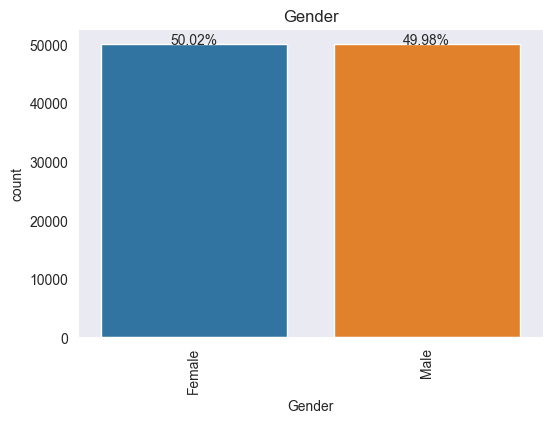

In [23]:
plt.figure(figsize=(6,4))
total=float(len(user_features['Gender']))
sen=sns.countplot(x='Gender', data=user_features)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Gender')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show()

The number of male and female tourists is fairly evenly distributed

In [24]:
user_features['Job'].unique()

array(['white collar', 'blue collar'], dtype=object)

In [25]:
#Getting the number of white collar and blue collar tourists
print(f'There are {user_features["Job"][user_features["Job"]=="white collar"].count()} white collar tourists')
print(f'There are {user_features["Job"][user_features["Job"]=="blue collar"].count()} blue collar tourists')

There are 63912 white collar tourists
There are 36088 blue collar tourists


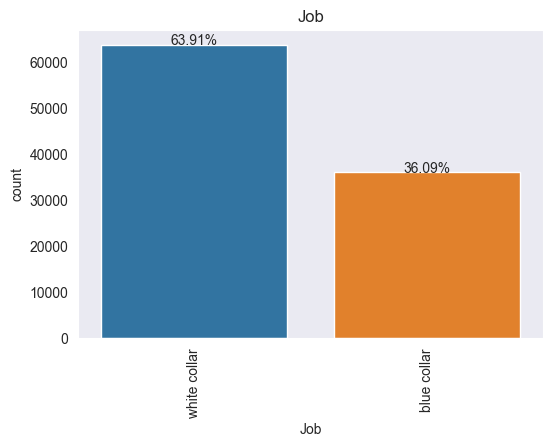

In [26]:
plt.figure(figsize=(6,4))
total=float(len(user_features['Job']))
sen=sns.countplot(x='Job', data=user_features)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Job')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.show()

In [27]:
user_features['Region'].unique()

array(['South Europe', 'North Europe', 'South America', 'Africa',
       'Middle East', 'East Europe', 'North America', 'Asia'],
      dtype=object)

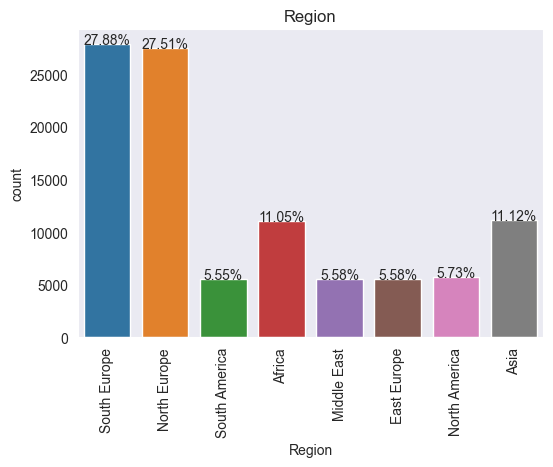

In [28]:
plt.figure(figsize=(6,4))
total=float(len(user_features['Region']))
sen=sns.countplot(x='Region', data=user_features)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Region')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()

A bulk of the tourists seem to come from South Europe and North Europe with South America having the lowest representation.

In [29]:
user_features['GroupComp'].unique()

array(['2Adlt+Child', '1Adlt', '2Adlt', 'GrpFriends'], dtype=object)

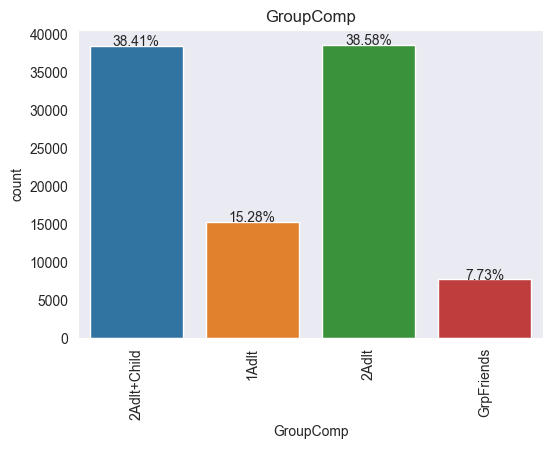

In [30]:
plt.figure(figsize=(6,4))
total=float(len(user_features['GroupComp']))
sen=sns.countplot(x='GroupComp', data=user_features)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('GroupComp')
plt.xlabel('GroupComp')
plt.xticks(rotation=90)
plt.show()

Most tourists travelled in pairs of 2 with some travelling with a child.

## User Ratings

In [31]:
user_ratings=pd.read_csv(r'C:\Users\jessica.ogwu\Desktop\Tourism spot recommendation system\tourism\tourism datasets\user_ratings.csv')
user_ratings.head(50)

,userId,itemId,rating
0,13,0,1.533462
1,15,0,1.283205
2,17,0,1.506836
3,19,0,1.260289
4,23,0,3.203168
5,24,0,2.645116
6,29,0,1.326969
7,44,0,4.293818
8,47,0,1.640807
9,59,0,2.807194


In [32]:
user_ratings.shape

(345368, 3)

There are over 300000 ratings provided by tourists. This is expected because one tourist would not provide ratings for all 23 destinations.

Next we will join the user_ratings table with the dest_spots table to carry out some more EDA.

In [33]:
new_ratings=pd.merge(user_ratings, destination_spots, on='itemId')
new_ratings.head()

,userId,itemId,rating,ItemName,Category,Quality
0,13,0,1.533462,Restaurant Fake,['Gastro'],1.647351
1,15,0,1.283205,Restaurant Fake,['Gastro'],1.647351
2,17,0,1.506836,Restaurant Fake,['Gastro'],1.647351
3,19,0,1.260289,Restaurant Fake,['Gastro'],1.647351
4,23,0,3.203168,Restaurant Fake,['Gastro'],1.647351


Next we can count the ratings we got for each restaurant.

In [34]:
new_ratings.groupby('ItemName')['rating'].count().sort_values(ascending=False)

ItemName
Fiction Nightclub            15264
Never Happened Festival      15180
Fake Brands Boutique         15177
Random Cultural Tour         15123
Secret Beach                 15112
Fake BTT Route               15111
Another Sport Event          15082
Fake Beach                   15072
Random Surfing Lessons       15042
Nonexisting Zipline          15027
Random Golf Lessons          15014
Unknown Nature Route         15012
Some Sport Event             15008
Bogus Waterpark              14992
False Tavern                 14990
Restaurant Fake              14945
Surprise Concert             14945
Random Shopping Mall         14935
Best Imaginary Restaurant    14897
MakeBelieve Pub              14892
Museum of Fake History       14888
Fake Klub                    14857
Bogus Spa                    14803
Name: rating, dtype: int64

On an average, about 15% of respondents provided responses for each destination.

Let us get an idea of the mean rating for each restaurant.

In [35]:
new_ratings.groupby('ItemName')['rating'].mean().sort_values(ascending=False)

ItemName
Random Cultural Tour         3.427827
Random Shopping Mall         3.351523
Bogus Spa                    3.339242
Random Surfing Lessons       3.116446
Fake Beach                   2.995566
Fake Brands Boutique         2.974881
Some Sport Event             2.972978
Fake Klub                    2.877170
Unknown Nature Route         2.875325
Museum of Fake History       2.854905
Best Imaginary Restaurant    2.718406
False Tavern                 2.577721
MakeBelieve Pub              2.462013
Never Happened Festival      2.314689
Restaurant Fake              2.222544
Surprise Concert             2.141511
Fake BTT Route               1.944467
Another Sport Event          1.933442
Nonexisting Zipline          1.792523
Random Golf Lessons          1.730683
Secret Beach                 1.659638
Bogus Waterpark              1.621705
Fiction Nightclub            1.554146
Name: rating, dtype: float64

It would be better to visualize the table with tourists as rows and destinations as columns with ratings as values. To do this, we could pivot the table.

In [36]:
users_ratings=user_ratings.pivot_table(index='userId', columns='itemId', values='rating')
users_ratings.head(20)

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.500420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667926,2.828157,NaN,NaN,NaN,1.632696,NaN
1,NaN,NaN,NaN,NaN,NaN,4.156108,NaN,1.845351,NaN,3.968529,NaN,NaN,NaN,4.705281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.709697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.341966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.596720,NaN,2.658896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.661253
4,NaN,NaN,1.373965,NaN,NaN,4.714443,1.636043,NaN,NaN,NaN,1.531573,NaN,NaN,NaN,NaN,NaN,2.277358,NaN,NaN,NaN,3.804309,1.182217,NaN
5,NaN,NaN,NaN,1.188851,NaN,1.323312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195162,NaN,NaN
6,NaN,NaN,NaN,1.596352,NaN,NaN,NaN,NaN,1.701678,NaN,1.568016,NaN,NaN,NaN,NaN,NaN,2.852247,NaN,NaN,NaN,NaN,1.544382,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982568,NaN,NaN,NaN,NaN,NaN,2.992974,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.794025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As expected there a lot of NaN values becaus most user will not rate all destinations.

## Building The Recommendation System

A recommender system could either be model based or memory based. For the sake of this project, we would be building a memory based recommender system.

There are three types of memory based recommender systems:
* Content based filtering recommender systems
* Collaborative filtering recommender sysytems
* Hybrid recommender systems

We will be building a hybrid recommender system which combines the features of both content based and collaborative recommender systems.

The collaborative based filtering technique will be applied to the user_rating table while content based filtering will be applied to both the dest spots and user features table. It is expected that a combination of these techniques with these tables would create a high performing tourist recommender system.

## Collaborative filtering


In [37]:
#First we handle the NANs present in the table, to do this we could either fill with zero or use some feature scaling technique
#like standardization or normalization, we will be filling with zero.

users_ratings=users_ratings.fillna(0)
users_ratings.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.50042,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,2.667926,2.828157,0.0,0.0,0.000000,1.632696,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,4.156108,0.000000,1.845351,0.0,3.968529,0.000000,0.00000,0.0,4.705281,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.00000,2.709697,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.341966,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.59672,0.0,2.658896,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.661253
4,0.0,0.00000,1.373965,0.0,0.0,4.714443,1.636043,0.000000,0.0,0.000000,1.531573,0.00000,0.0,0.000000,0.0,0.0,2.277358,0.000000,0.0,0.0,3.804309,1.182217,0.000000


In [198]:
#Create a numpy array of the users_ratings
user_item_matrix=np.array(users_ratings)
user_item_matrix

array([[0.        , 1.50042029, 0.        , ..., 0.        , 1.63269589,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.70969684, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.89870291]])

In [39]:
# Perform matrix factorization using SVD
def matrix_factorization(R, K=2, steps=10, alpha=0.01, beta=0.02):
    # R: user-item matrix
    # K: number of latent features
    # steps: number of iterations
    # alpha: learning rate
    # beta: regularization parameter
    
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    # N by M= N by K multiplied by k by M
    
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :])
                    for k in range(K):
                        P[i, k] += alpha * (2 * eij * Q[j, k] - beta * P[i, k])
                        Q[j, k] += alpha * (2 * eij * P[i, k] - beta * Q[j, k])
        
        # Calculate RMSE
        rmse = 0
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    rmse += (R[i, j] - np.dot(P[i, :], Q[j, :])) ** 2
                    for k in range(K):
                        rmse += (beta / 2) * (P[i, k] ** 2 + Q[j, k] ** 2)
        rmse = np.sqrt(rmse / (N * M))
        if step % 1000 == 0:
            print("Step:", step, "RMSE:", rmse)
    
    return P, Q

In [40]:
# Perform matrix factorization
latent_features = 3
P, Q = matrix_factorization(user_item_matrix, K=latent_features)

Step: 0 RMSE: 0.33249958991344536


In [41]:
# Calculate predicted ratings
predicted_collaborative_ratings = np.dot(P, Q.T)

In [42]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(user_item_matrix[user_item_matrix > 0], predicted_collaborative_ratings[user_item_matrix > 0]))
print("Final RMSE:", rmse)
print(predicted_collaborative_ratings)

Final RMSE: 0.6135994457746267
[[1.87332383 1.30637358 2.9036437  ... 1.43449288 1.3528996  2.56017733]
 [2.92470708 2.17306908 4.83535927 ... 2.34630926 2.22331943 4.19653955]
 [1.74551856 1.1602068  2.48346585 ... 1.24330241 1.19741372 2.06414491]
 ...
 [1.58800498 1.21406869 2.65666067 ... 1.27763193 1.22783928 2.21264718]
 [1.2449827  0.99855209 2.24020941 ... 1.06552192 1.01023861 1.93569984]
 [2.14718703 1.48419412 3.2607577  ... 1.61439248 1.53337857 2.8193439 ]]


In [43]:
predicted_collaborative_ratings.shape

(97605, 23)

## Content Based Filtering

In [220]:
user_features.head(30)

,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,2,Male,blue collar,South America,1Adlt
3,5,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,Male,blue collar,North Europe,1Adlt
5,1,1,Female,white collar,South Europe,1Adlt
6,2,1,Female,blue collar,Africa,2Adlt
7,5,3,Male,white collar,South America,2Adlt
8,4,2,Male,blue collar,South Europe,1Adlt


In [221]:
user_features.iloc[27,:]

Age                      3
Budget                   3
Gender                Male
Job           white collar
Region       North America
GroupComp       GrpFriends
Name: 27, dtype: object

In [45]:
#Label encode user features 
lb=LabelEncoder()
users_features=user_features.apply(LabelEncoder().fit_transform)
users_features.head()



,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,0,0,0,1,7,2
1,1,1,1,0,5,2
2,1,1,1,0,6,0
3,4,1,0,0,7,2
4,2,0,1,0,5,0


Next we one hot encode our category feature to carry out content based filtering.

In [46]:
#Remember our destination spots
destination_spots

,itemId,ItemName,Category,Quality
0,0,Restaurant Fake,['Gastro'],1.647351
1,1,Fiction Nightclub,['Nightlf'],1.188559
2,2,Random Shopping Mall,"['Shop', 'Relax']",2.948170
3,3,Bogus Waterpark,['Themeprk'],1.830793
4,4,Unknown Nature Route,"['Nature', 'Relax']",2.782113
5,5,Some Sport Event,"['Sports', 'Events']",4.476363
6,6,Never Happened Festival,"['Events', 'Culture']",1.836556
7,7,False Tavern,"['Gastro', 'Culture']",1.365270
8,8,MakeBelieve Pub,"['Gastro', 'Nightlf']",1.957996
9,9,Another Sport Event,"['Sports', 'Events']",2.133209


In [47]:
#Generate columns for the category column
destination_spots['Gastro']=destination_spots['Category'].apply(lambda x: 1 if 'Gastro' in x else 0)
destination_spots['NightLife']=destination_spots['Category'].apply(lambda x: 1 if 'Nightlf' in x else 0)
destination_spots['Shop']=destination_spots['Category'].apply(lambda x: 1 if 'Shop' in x else 0)
destination_spots['Relax']=destination_spots['Category'].apply(lambda x: 1 if 'Relax' in x else 0)
destination_spots['Events']=destination_spots['Category'].apply(lambda x: 1 if 'Events' in x else 0)
destination_spots['Culture']=destination_spots['Category'].apply(lambda x: 1 if 'Culture' in x else 0)
destination_spots['Sports']=destination_spots['Category'].apply(lambda x: 1 if 'Sports' in x else 0)
destination_spots['Beach']=destination_spots['Category'].apply(lambda x: 1 if 'Beach' in x else 0)
destination_spots['Nature']=destination_spots['Category'].apply(lambda x: 1 if 'Nature' in x else 0)
destination_spots['Themeprk']=destination_spots['Category'].apply(lambda x: 1 if 'Themeprk' in x else 0)



In [48]:
#Visualize results
destination_spots.head()

,itemId,ItemName,Category,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk
0,0,Restaurant Fake,['Gastro'],1.647351,1,0,0,0,0,0,0,0,0,0
1,1,Fiction Nightclub,['Nightlf'],1.188559,0,1,0,0,0,0,0,0,0,0
2,2,Random Shopping Mall,"['Shop', 'Relax']",2.948170,0,0,1,1,0,0,0,0,0,0
3,3,Bogus Waterpark,['Themeprk'],1.830793,0,0,0,0,0,0,0,0,0,1
4,4,Unknown Nature Route,"['Nature', 'Relax']",2.782113,0,0,0,1,0,0,0,0,1,0


In [49]:
#Drop columns not needed for content based filtering
dest_spots=destination_spots.drop(columns=['ItemName','Category'])
dest_spots.head()

,itemId,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk
0,0,1.647351,1,0,0,0,0,0,0,0,0,0
1,1,1.188559,0,1,0,0,0,0,0,0,0,0
2,2,2.948170,0,0,1,1,0,0,0,0,0,0
3,3,1.830793,0,0,0,0,0,0,0,0,0,1
4,4,2.782113,0,0,0,1,0,0,0,0,1,0


In [50]:
user_ratings.head()

,userId,itemId,rating
0,13,0,1.533462
1,15,0,1.283205
2,17,0,1.506836
3,19,0,1.260289
4,23,0,3.203168


In [51]:
#Joining the user_ratings dataset with the dest_spots dataset
df=user_ratings.merge(dest_spots, on="itemId")


In [52]:
df.head(20)

,userId,itemId,rating,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk
0,13,0,1.533462,1.647351,1,0,0,0,0,0,0,0,0,0
1,15,0,1.283205,1.647351,1,0,0,0,0,0,0,0,0,0
2,17,0,1.506836,1.647351,1,0,0,0,0,0,0,0,0,0
3,19,0,1.260289,1.647351,1,0,0,0,0,0,0,0,0,0
4,23,0,3.203168,1.647351,1,0,0,0,0,0,0,0,0,0
5,24,0,2.645116,1.647351,1,0,0,0,0,0,0,0,0,0
6,29,0,1.326969,1.647351,1,0,0,0,0,0,0,0,0,0
7,44,0,4.293818,1.647351,1,0,0,0,0,0,0,0,0,0
8,47,0,1.640807,1.647351,1,0,0,0,0,0,0,0,0,0
9,59,0,2.807194,1.647351,1,0,0,0,0,0,0,0,0,0


In [53]:
#Next we join this dataset with the user features dataset
final_df=df.merge(users_features, on="userId")
final_df.head()

,userId,itemId,rating,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk,Age,Budget,Gender,Job,Region,GroupComp
0,13,0,1.533462,1.647351,1,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0
1,13,2,3.034984,2.948170,0,0,1,1,0,0,0,0,0,0,3,1,0,0,5,0
2,13,3,1.295660,1.830793,0,0,0,0,0,0,0,0,0,1,3,1,0,0,5,0
3,13,18,2.662960,1.853823,0,0,0,0,0,0,1,0,0,0,3,1,0,0,5,0
4,13,19,3.002312,4.636606,0,1,0,0,0,0,0,0,0,0,3,1,0,0,5,0


Next, we can make use of a Gradient Boosting Regressor model to build for content based filtering

In [54]:
#Set ratings to y variable
y=final_df.iloc[:, 2].values
y

array([1.53346216, 3.03498449, 1.29566007, ..., 2.32362681, 2.69970416,
       2.49230547])

In [55]:
#Drop ratings column
final_df=final_df.drop(columns="rating")
final_df.head()



,userId,itemId,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk,Age,Budget,Gender,Job,Region,GroupComp
0,13,0,1.647351,1,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0
1,13,2,2.948170,0,0,1,1,0,0,0,0,0,0,3,1,0,0,5,0
2,13,3,1.830793,0,0,0,0,0,0,0,0,0,1,3,1,0,0,5,0
3,13,18,1.853823,0,0,0,0,0,0,1,0,0,0,3,1,0,0,5,0
4,13,19,4.636606,0,1,0,0,0,0,0,0,0,0,3,1,0,0,5,0


In [56]:
X=final_df.iloc[:,:].values
X

array([[1.30000000e+01, 0.00000000e+00, 1.64735146e+00, ...,
        0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [1.30000000e+01, 2.00000000e+00, 2.94817012e+00, ...,
        0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [1.30000000e+01, 3.00000000e+00, 1.83079289e+00, ...,
        0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       ...,
       [9.88020000e+04, 2.20000000e+01, 4.73605642e+00, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [9.97470000e+04, 2.20000000e+01, 4.73605642e+00, ...,
        0.00000000e+00, 5.00000000e+00, 3.00000000e+00],
       [9.97500000e+04, 2.20000000e+01, 4.73605642e+00, ...,
        1.00000000e+00, 5.00000000e+00, 0.00000000e+00]])

In [57]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [58]:
X_train

array([[6.75560000e+04, 1.60000000e+01, 4.59845876e+00, ...,
        0.00000000e+00, 4.00000000e+00, 1.00000000e+00],
       [4.66620000e+04, 1.50000000e+01, 2.73052852e+00, ...,
        1.00000000e+00, 7.00000000e+00, 1.00000000e+00],
       [5.48910000e+04, 2.00000000e+01, 1.45211387e+00, ...,
        1.00000000e+00, 5.00000000e+00, 2.00000000e+00],
       ...,
       [3.10990000e+04, 2.00000000e+00, 2.94817012e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.60300000e+04, 2.10000000e+01, 1.23997687e+00, ...,
        0.00000000e+00, 7.00000000e+00, 1.00000000e+00],
       [7.46600000e+03, 3.00000000e+00, 1.83079289e+00, ...,
        0.00000000e+00, 7.00000000e+00, 1.00000000e+00]])

In [59]:
y_train

array([2.31974321, 3.7604297 , 1.30080909, ..., 4.66220948, 1.48901092,
       1.21973055])

In [60]:
#Build gbr model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [321]:
model_importance=model.feature_importances_

In [328]:
lis_features=[]
lis_importance=[]
for feature, importance in zip(final_df.columns, model_importance):
    lis_features.append(feature)
    lis_importance.append(importance)

lis_importance

[0.0,
 0.020736145975052418,
 0.627754376964976,
 0.07722752428797248,
 0.00037247161194110015,
 0.021259428622798327,
 0.018970871245192214,
 0.011109453205515268,
 0.03667703345940923,
 0.012564593920430862,
 0.0,
 0.0010707634957211913,
 0.0009440660169653547,
 0.006855592784355817,
 0.0009434325943478854,
 0.0012357273218226161,
 0.10861703112251957,
 0.046022231691910796,
 0.007639255679069036]

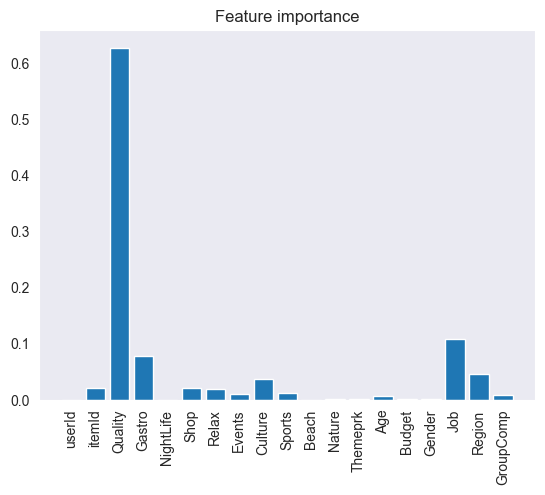

In [331]:
X=np.array(lis_features)
y=np.array(lis_importance)
plt.bar(X,y)
plt.title('Feature importance')
plt.xticks(rotation=90);

In [61]:
#Get predictions
preds = model.predict(X_test)
rmse = np.sqrt(np.mean((preds- y_test)**2))
print(f'content-based rmse = {rmse}')

content-based rmse = 0.71419458212431


In [62]:
# Make predictions on entire dataset
predicted_ratings=model.predict(X)
predicted_ratings

array([1.97899207, 3.18639523, 1.81400146, ..., 2.868805  , 3.11942071,
       2.87152218])

In [63]:
#Generate new predicted ratings column
final_df['new_ratings']=predicted_ratings
final_df.head()

,userId,itemId,Quality,Gastro,NightLife,Shop,Relax,Events,Culture,Sports,Beach,Nature,Themeprk,Age,Budget,Gender,Job,Region,GroupComp,new_ratings
0,13,0,1.647351,1,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0,1.978992
1,13,2,2.948170,0,0,1,1,0,0,0,0,0,0,3,1,0,0,5,0,3.186395
2,13,3,1.830793,0,0,0,0,0,0,0,0,0,1,3,1,0,0,5,0,1.814001
3,13,18,1.853823,0,0,0,0,0,0,1,0,0,0,3,1,0,0,5,0,1.965226
4,13,19,4.636606,0,1,0,0,0,0,0,0,0,0,3,1,0,0,5,0,3.079262


In [64]:
content_filter_df=final_df.pivot_table(index="userId", columns="itemId", values='new_ratings')
content_filter_df.head(20)

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.518616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.194513,3.708553,NaN,NaN,NaN,1.693665,NaN
1,NaN,NaN,NaN,NaN,NaN,3.298662,NaN,1.828417,NaN,2.239698,NaN,NaN,NaN,3.660054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.951497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.008608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.601214,NaN,3.317315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.183211
4,NaN,NaN,2.946050,NaN,NaN,3.377384,2.17073,NaN,NaN,NaN,2.013352,NaN,NaN,NaN,NaN,NaN,3.395396,NaN,NaN,NaN,2.227890,1.882141,NaN
5,NaN,NaN,NaN,1.645509,NaN,2.953434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889969,NaN,NaN
6,NaN,NaN,NaN,1.513059,NaN,NaN,NaN,NaN,1.747112,NaN,1.793417,NaN,NaN,NaN,NaN,NaN,3.379384,NaN,NaN,NaN,NaN,1.629719,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955340,NaN,NaN,NaN,NaN,NaN,1.557311,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.474323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#Fill NaNs with zero
content_filter_df=content_filter_df.fillna(0)
content_filter_df.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.518616,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.194513,3.708553,0.0,0.0,0.00000,1.693665,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,3.298662,0.00000,1.828417,0.0,2.239698,0.000000,0.000000,0.0,3.660054,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
2,0.0,0.000000,2.951497,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,2.008608,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,2.601214,0.0,3.317315,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000,3.183211
4,0.0,0.000000,2.946050,0.0,0.0,3.377384,2.17073,0.000000,0.0,0.000000,2.013352,0.000000,0.0,0.000000,0.0,0.0,3.395396,0.000000,0.0,0.0,2.22789,1.882141,0.000000


In [66]:
users_ratings.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.50042,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,2.667926,2.828157,0.0,0.0,0.000000,1.632696,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,4.156108,0.000000,1.845351,0.0,3.968529,0.000000,0.00000,0.0,4.705281,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.00000,2.709697,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.341966,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.59672,0.0,2.658896,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.661253
4,0.0,0.00000,1.373965,0.0,0.0,4.714443,1.636043,0.000000,0.0,0.000000,1.531573,0.00000,0.0,0.000000,0.0,0.0,2.277358,0.000000,0.0,0.0,3.804309,1.182217,0.000000


In [67]:
#Create an array for content based filtering 
content_based_array=np.array(content_filter_df)
content_based_array.shape

(97605, 23)

In [68]:
#Weighted hybrid model
chart_val=[]
w=np.linspace(0,1,21)
for i in w:
  final_pred=predicted_collaborative_ratings[user_item_matrix>0]*i + (content_based_array[user_item_matrix>0]*(1-i))
  rmse=np.sqrt(np.mean(np.square(final_pred-user_item_matrix[user_item_matrix>0])))
  chart_val.append([i,rmse])
  
chart_val


[[0.0, 0.7135212619428793],
 [0.05, 0.6994545608577163],
 [0.1, 0.6861159060848985],
 [0.15000000000000002, 0.6735485527255478],
 [0.2, 0.6617964427167901],
 [0.25, 0.650903735374482],
 [0.30000000000000004, 0.6409142503285823],
 [0.35000000000000003, 0.6318708271806682],
 [0.4, 0.6238146123870887],
 [0.45, 0.6167842908434555],
 [0.5, 0.6108152868525915],
 [0.55, 0.6059389658144634],
 [0.6000000000000001, 0.6021818731494063],
 [0.65, 0.5995650497027766],
 [0.7000000000000001, 0.59810346238623],
 [0.75, 0.5978055846423974],
 [0.8, 0.5986731535310562],
 [0.8500000000000001, 0.6007011194478823],
 [0.9, 0.6038777918345708],
 [0.9500000000000001, 0.6081851711888361],
 [1.0, 0.6135994457746267]]

Text(0, 0.5, 'RMSE')

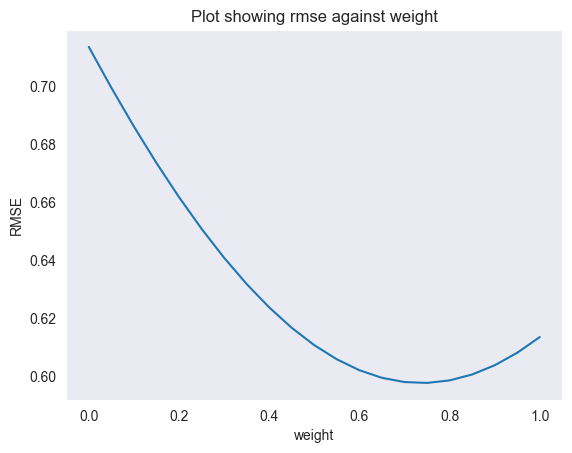

In [320]:
chart_val_np = np.array(chart_val)
plt.plot(chart_val_np[:, 0], chart_val_np[:,1])
plt.title('Plot showing rmse against weight')
plt.xlabel('weight')
plt.ylabel('RMSE')

## Utilizing model
To utilize the model:
* User will provide ratings for some locations
* Generate ratings for other locations using GBR model 
* Use collaborative filtering on chosen locations to generate ratings
* Combine using hybrid
* Aggregate for group

Assume a user provides data like:
* Age:25
* Budget:$15000
* Gender:Female
* Job:White collar
* Region: South Europe
* GroupComp: 2Adlts

Rates 4 restaurants 
* Restaurant Fake:4.0
* Secret Beach: 2.2
* False Tavern: 1.5
* Bogus Spa: 3.2

In [277]:
#Get activities user did not rate
def get_restaurants_not_rated(restaurants):
  list_restaurants_to_predict=[]
  for i in destination_spots['ItemName'].unique():
    if i not in restaurants:
        list_restaurants_to_predict.append(i)
  return list_restaurants_to_predict


  
  

In [225]:
def generate_user_matrix(userId, age, budget, gender, job, region, groupcomp):
    user_df=pd.DataFrame({'userId':userId, 'Age':[age], 'Budget':[budget], 'Gender':[gender], 'Job':[job], 'Region':[region], 'GroupComp':[groupcomp]})
    return user_df

In [278]:
#Get activity details for activities not rated by user
def get_activity_details(restaurants,userId, age, budget, gender, job, region, groupcomp):
    restaurants_to_predict=get_restaurants_not_rated(restaurants=restaurants)
    activity_df=destination_spots[destination_spots['ItemName'].isin(restaurants_to_predict)].reset_index()
    activity_df=activity_df.drop(columns=['ItemName', 'Category'])
    user_df=generate_user_matrix(userId, age, budget, gender, job, region, groupcomp)
    new_user_df=pd.concat([user_df]*len(activity_df), ignore_index=True)
    concat_user_activity=pd.concat([new_user_df,activity_df], axis=1)
    new_order=['userId', 'itemId', 'Quality', 'Gastro', 'NightLife', 'Shop', 'Relax', 'Events', 'Culture', 'Sports', 'Beach', 'Nature', 'Themeprk', 'Age', 'Budget', 'Gender', 'Job', 'Region', 'GroupComp']
    final_df=concat_user_activity[new_order]
    return final_df

In [227]:
def predict_content_ratings(user_df):
    user_inputs=user_df.iloc[:,:].values
    pred_ratings=model.predict(user_inputs)
    user_df['predicted_ratings']=pred_ratings
    user_df=user_df.pivot_table(index="userId", columns="itemId", values="predicted_ratings")
    user_array=np.array(user_df)
    return user_array
    
    

 ## Matrix Factorization 

In [163]:
def build_user_ratings(user_ratings):
    user_ratings_array=[0]*destination_spots.shape[0]
    restaurant_names=user_ratings.keys()
    for i in range(destination_spots.shape[0]):
        for j in restaurant_names:
            dest_id=destination_spots['itemId'][destination_spots['ItemName']==j]
            if int(dest_id)==i:
                user_ratings_array[i]=user_ratings[j]
    return user_ratings_array


In [275]:

def user_matrix_factorization(user_ratings):
    # Assume you have the user's ratings and the list of recommended item indices
    new_user_ratings=np.array(build_user_ratings(user_ratings))
   


    # Update the user matrix with the new user's ratings
    user_matrix = np.vstack([user_item_matrix, new_user_ratings])
    latent_features = 3
    P, Q = matrix_factorization(user_matrix, K=latent_features)

    # Generate recommendations for the new user
    predicted_user_ratings = np.dot(P[-1], Q.T)
    dest_spots=destination_spots['ItemName'].unique()

    
    # # Exclude rated items from the list of recommended items

    ratings=np.argsort(predicted_user_ratings)[::-1]

    return  predicted_user_ratings[new_user_ratings==0]
   


In [316]:
def hybrid_filter(restaurants, userId, age, budget, gender, job, region, groupcomp):
    restaurants_rated=restaurants.keys()
    list_restaurants_not_rated=get_restaurants_not_rated(restaurants_rated)
    user_df=get_activity_details(restaurants_rated,userId, age, budget, gender, job, region, groupcomp)
    user_content_array=predict_content_ratings(user_df)
    user_collab_array=user_matrix_factorization(restaurants)
    final_pred=user_collab_array*0.75 + user_content_array* 0.25
    best_eight_activities=np.argsort(final_pred[0])[::-1][:8]
    recommended_items=[list_restaurants_not_rated[i] for i in best_eight_activities]
    return recommended_items

In [318]:
user1_pred=hybrid_filter({'Restaurant Fake':4.0, 'Secret Beach':2.2, 'False Tavern':1.5, 'Bogus Spa': 3.2}, 198673210, 0,2,1,0,5,3)
user2_pred=hybrid_filter({'Fiction Nightclub':5.0, 'Best Imaginary Restaurant':2.5, 'Museum of Fake History':1.3}, 198673255, 0,2,0,1,4,3)
user3_pred=hybrid_filter({'Some Sport Event':3.7, 'Fake Klub':4.0, 'Unknown Nature Route':4.5}, 198679075, 1,2,0,0,7,3)

print(user1_pred)
print(user2_pred) 
print(user3_pred)

C:\Users\jessica.ogwu\AppData\Local\Temp\ipykernel_46516\1320286131.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.3318921984757229


C:\Users\jessica.ogwu\AppData\Local\Temp\ipykernel_46516\1320286131.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.3322276562208685


C:\Users\jessica.ogwu\AppData\Local\Temp\ipykernel_46516\1320286131.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.3323871079552823
['Random Shopping Mall', 'Random Cultural Tour', 'Random Surfing Lessons', 'Fake Brands Boutique', 'Unknown Nature Route', 'Fake Klub', 'Fake Beach', 'Some Sport Event']
['Random Shopping Mall', 'Bogus Spa', 'Random Cultural Tour', 'Fake Brands Boutique', 'Random Surfing Lessons', 'Fake Klub', 'Unknown Nature Route', 'Fake Beach']
['Bogus Spa', 'Random Shopping Mall', 'Random Cultural Tour', 'Random Surfing Lessons', 'Fake Beach', 'Fake Brands Boutique', 'Museum of Fake History', 'Best Imaginary Restaurant']


In [319]:
lis=[]
for i,j,k in zip(user1_pred, user2_pred, user3_pred):
    if i in user2_pred and i in user3_pred:
        lis.append(i)
    if j in user1_pred and j in user3_pred:
        lis.append(j)
    if k in user1_pred and k in user1_pred:
        lis.append(k)

print(set(lis))

{'Random Surfing Lessons', 'Random Cultural Tour', 'Fake Beach', 'Random Shopping Mall', 'Fake Brands Boutique'}
